<h2>Image Similarity App.</h2>
<h3>Part #2. Similarity Search</h3>

<p>
Our goal is to find another photo in our dataset similar to the current (given) one. We begin by loading the precomputed features.
</p>
<p>
We will use Python's machine learning library <code>scikit-learn</code> for finding <i>nearest neighbors</i> of the query features, that is, features that represent a query image. We train a nearest-neighbor model using <b>brute-force</b> algorithm to find the nearest five neighbors based on Euclidean distance.
</p>

In [19]:
# Import packages and modules
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

%matplotlib inline

In [20]:
# Read required pickle data units
filenames = pickle.load(open('./data/filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('./data/features-caltech101-resnet.pickle', 'rb'))

In [21]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

<p>Now we have both the <code>indices</code> and <code>distances</code> of the nearest five (<i>5</i>) neighbors of the very first query feature (which represent the first image).</p>
<p>
Now that we know the indices, let's see the actual image behind that feature. First, we pick an image to query, located at say, <code>index=0</code>.
</p>

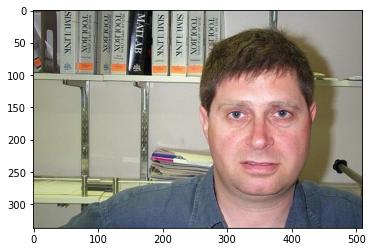

In [22]:
plt.imshow(mpimg.imread(filenames[0]))

<p>Now let's examine the nearest neighbors by plotting the first result.</p>

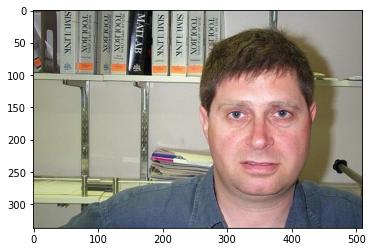

In [23]:
plt.imshow(mpimg.imread(filenames[indices[0][0]]))
# <--bug in the book?

<p>
It is a duplicate, yes? Actually, the nearest index will be the image itself because that is what is being queried.
</p>

In [24]:
for i in range(5):
    print(distances[0][i])

5.6741932e-08
0.9479309
0.95102996
0.9580637
0.98677206


<p>Now let's plot the real first nearest neighbor.</p>

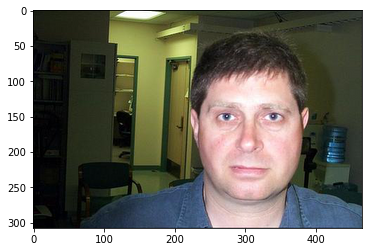

In [25]:
plt.imshow(mpimg.imread(filenames[indices[0][1]]), interpolation='lanczos')

<p>
We would probably use this functionality regularly, so we have already built a helper function <code>plot_images()</code> that visualizes several query images with their nearest neighbors. Now let's call this function to visualize the nearest neighbors of six (<i>6</i>) random images.
</p>

In [26]:
# Helper function to get the classname
def classname(str):
    return str.split('/')[-2]


# Helper function to get the classname and filename
def classname_filename(str):
    return str.split('/')[-2] + '/' + str.split('/')[-1]


# Helper functions to plot the nearest images given a query image
def plot_images(filenames, distances):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 10))
    columns = 4
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        if i == 0:
            ax.set_title("Query Image\n" + classname_filename(filenames[i]))
        else:
            ax.set_title("Similar Image\n" + classname_filename(filenames[i]) +
                         "\nDistance: " +
                         str(float("{0:.2f}".format(distances[i]))))
        plt.imshow(image)
        # To save the plot in a high definition format i.e. PDF, uncomment the following line:
        #plt.savefig('results/' + str(random.randint(0,10000))+'.pdf', format='pdf', dpi=1000)
        # We will use this line repeatedly in our code.

CPU times: user 1min 42s, sys: 3.65 s, total: 1min 45s
Wall time: 15.4 s


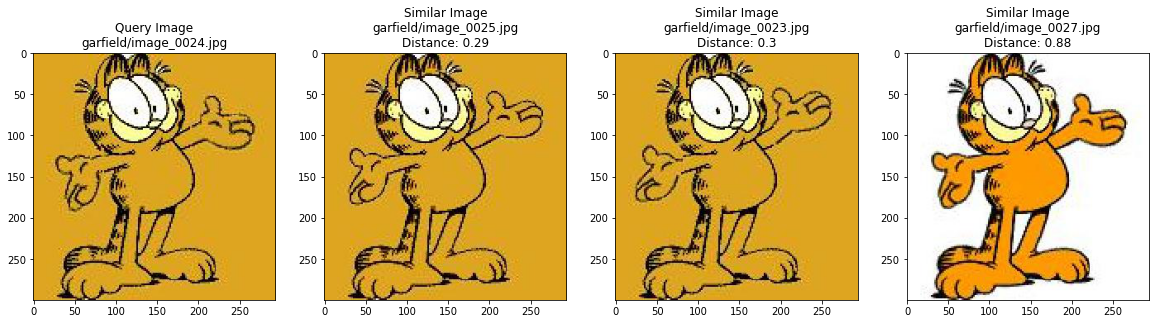

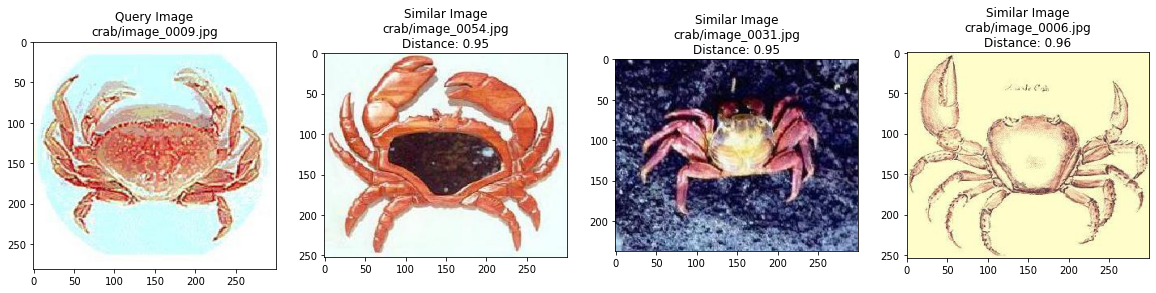

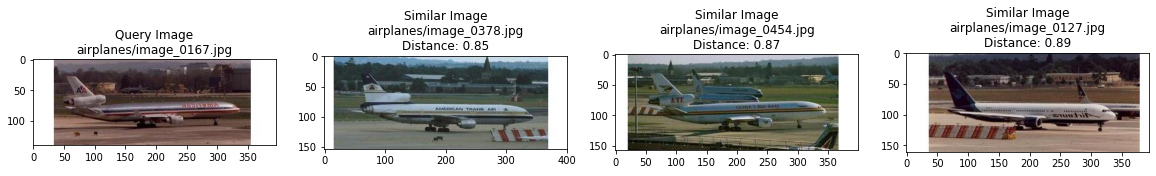

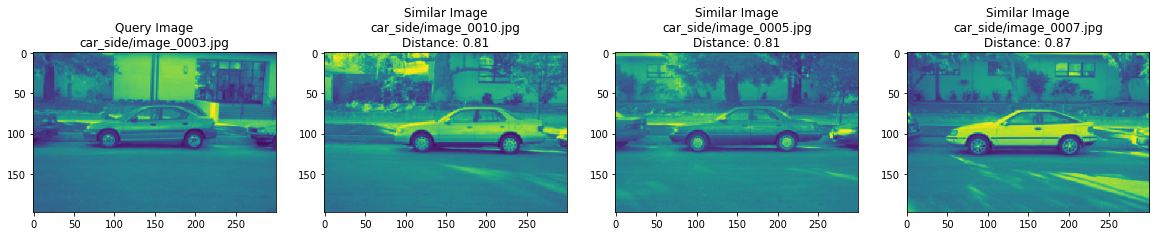

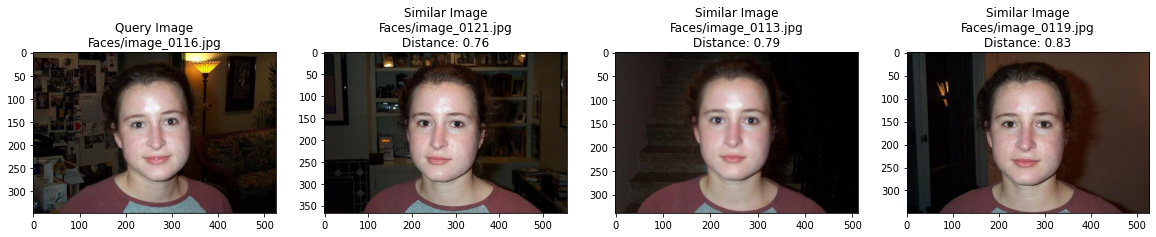

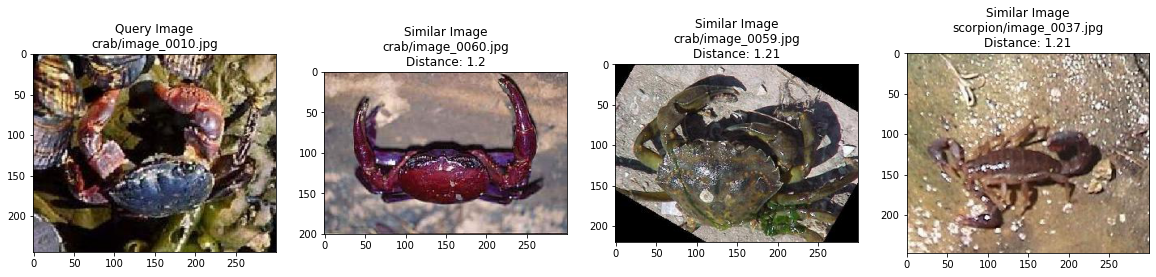

In [31]:
%%time
for i in range(6):
    random_image_index = random.randint(0, len(filenames))
    distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
    # do not take the first closest image as it will be the same image
    similar_image_paths = [filenames[random_image_index]] + [filenames[indices[0][i]] for i in range(1, 4)]
    plot_images(similar_image_paths, distances[0])